In [18]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### tree plotting
import PIL.Image
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from IPython.display import display
from matplotlib.colors import PowerNorm
from ete3 import Tree, TreeStyle, NodeStyle, TextFace


# tree structure in the reference

In [2]:
# Load OTU Data
output_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/processed_otus_info.csv"
df_otus = pd.read_csv(output_path)

N = 100  
selected_otus = df_otus.sample(N)  

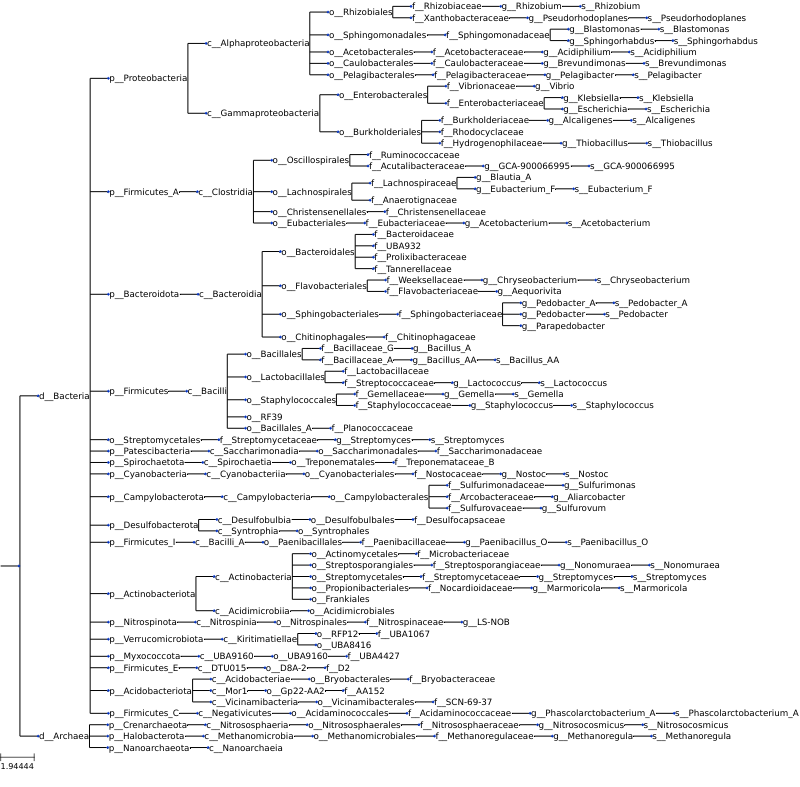

In [3]:
tree = Tree()

unique_taxonomies = selected_otus["taxonomy"]

for tax_str in unique_taxonomies:
    levels = [lvl.strip() for lvl in tax_str.split(";") if lvl.strip()]

    parent = tree    
    for lvl in levels:
        match = None
        for child in parent.children:
            if child.name == lvl:
                match = child
                break
        if match:
            parent = match
        else:
            parent = parent.add_child(name=lvl)

for node in tree.traverse():
    if not node.is_root():
        node.add_face(TextFace(node.name, fsize=10), column=0)

ts = TreeStyle()
ts.show_leaf_name = False   # We already label with faces
ts.mode = "r"               # rectangular layout

# Render the tree
tree.render("taxonomy_tree.png", w=800, units="px", tree_style=ts)
display(PIL.Image.open("taxonomy_tree.png"))

# couting all nodes vs all unique nodes

In [89]:
# Load OTU Data
output_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/processed_otus_info.csv"
df_otus = pd.read_csv(output_path)

# Dictionary to store full hierarchy counts
taxonomy_hierarchy_counts = defaultdict(int)

for tax_str in df_otus["taxonomy"].dropna():
    levels = tax_str.split(";")
    
    # Build the full hierarchy path progressively
    hierarchy_path = []
    
    for lvl in levels:
        lvl = lvl.strip()
        if lvl:
            hierarchy_path.append(lvl)  # Add to hierarchy path
            full_hierarchy = " > ".join(hierarchy_path)  # Convert list to string representation
            taxonomy_hierarchy_counts[full_hierarchy] += 1

# Convert to DataFrame
df_taxonomy_counts = pd.DataFrame(
    taxonomy_hierarchy_counts.items(), 
    columns=["Taxonomic Hierarchy", "OTU Count"]
)

# Sort by OTU count
df_taxonomy_counts = df_taxonomy_counts.sort_values(by="OTU Count", ascending=False)

# # Save results
# output_count_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/taxonomy_hierarchy_counts.csv"
# df_taxonomy_counts.to_csv(output_count_path, index=False)


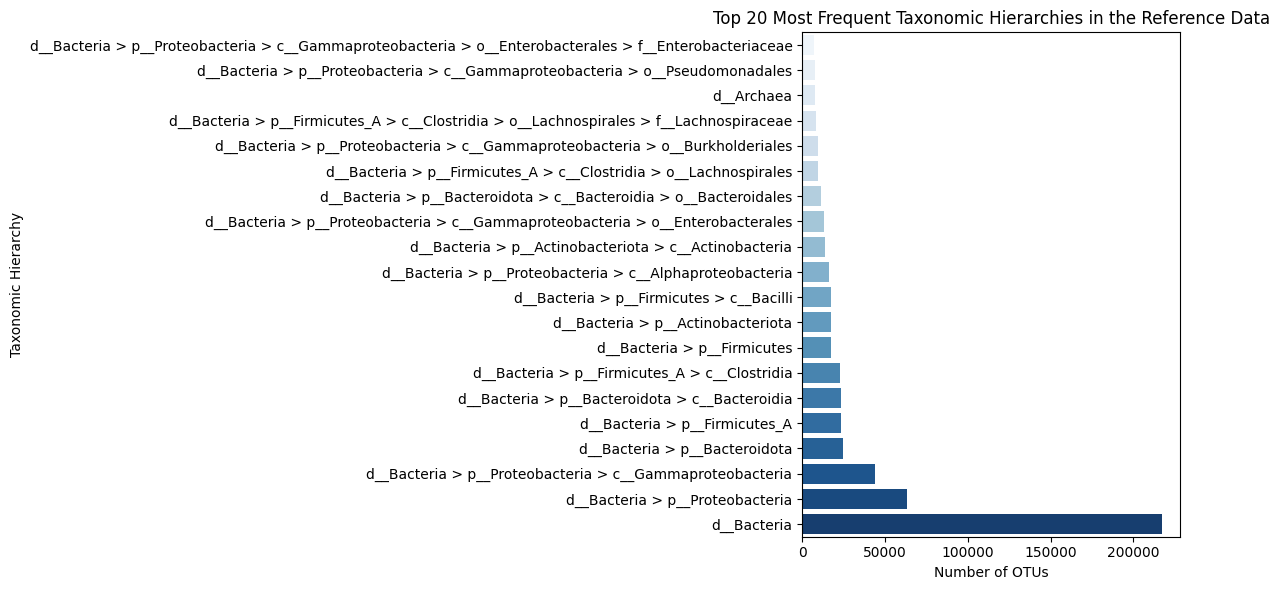

In [8]:
TOP_N = 20  # Adjust this number based on how many you want to visualize

df_top_taxonomies = df_taxonomy_counts.head(TOP_N)

plt.figure(figsize=(12, 6))
sns.barplot(
    y=df_top_taxonomies["Taxonomic Hierarchy"], 
    x=df_top_taxonomies["OTU Count"], 
    hue = df_top_taxonomies["Taxonomic Hierarchy"],
    palette="Blues_r"
)

plt.xlabel("Number of OTUs")
plt.ylabel("Taxonomic Hierarchy")
plt.title(f"Top {TOP_N} Most Frequent Taxonomic Hierarchies in the Reference Data")
plt.gca().invert_yaxis()  # Invert to show the highest at the top
plt.tight_layout()

plt.show()

In [97]:
df_otus.head()

,otu_id,count,read,taxonomy,alt_taxonomy,ncbi_ref_id,ref_genome,accession_id,confidence_score,read_count,sec_confidence_score,sec_read_count
0,90_1331;96_6200;97_7452;98_46017;99_90652,2,GCTTAATACATGCAAGTCGAACGCGAAAGGGGCTTCGGCCCTGAGT...,d__Bacteria;p__Acidobacteriota;c__Blastocatell...,Bacteria;Acidobacteria;Blastocatellia,JF265871:1..1344,GB_GCA_003222245.1~QHVH01000001.1,NC_016024:103114..104617,0.858798,942,0.812454,787
1,90_15782;96_6806;97_8149;98_9996;99_120474,1,CGGGTGCGTAACACGTGAGAAACCTGCCCCGGTCTCTGGGATAACA...,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,Bacteria;Actinobacteria;Acidimicrobiia;Acidimi...,KC358213:1..1308,RS_GCF_000350145.1~NZ_BAOL01000001.1,NC_020520:2930699..2932226,0.941131,1149,0.931957,1125
2,90_18593;96_74510;97_96468;98_130600;99_199293,3,AAGATTAAGCCATGCATGTCTAAGTATAAGCATCTATACAGTGAAA...,d__Bacteria,Eukaryota;Ascomycota;Saccharomycetes;Saccharom...,AY520173:1..1684,RS_GCF_003006845.1~NZ_PXMA01000065.1,AB018123:1..1765,0.917031,191,0.975518,995
3,90_1368;96_28107;97_35403;98_45723;99_64686,1,ATGAACGCTAGCTACAGGCTTAACACATGCAAGTCGCGGGGCAGCA...,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidal...,GU198354:1..1488,RS_GCF_002251535.1~NZ_NPJD01000018.1,NC_014033:223907..225439,0.893145,1155,0.886348,1139
4,90_18;96_298;97_4511;98_47806;99_67852,1,GCGGACGGGTGAGTAATGCTTGGGAATCTGGCTTATGGAGGGGGAT...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,Bacteria;Proteobacteria;Gammaproteobacteria;Pa...,HQ717327:1..1300,RS_GCF_000973525.1~NZ_CP004391.1-#4,M75050:1..1479,0.984604,1254,0.976905,1234


In [100]:
df_otus.shape, df_otus["taxonomy"].dropna().shape

((225066, 12), (225011,))

Some OTUs didnt have taxonomy (55 cases)

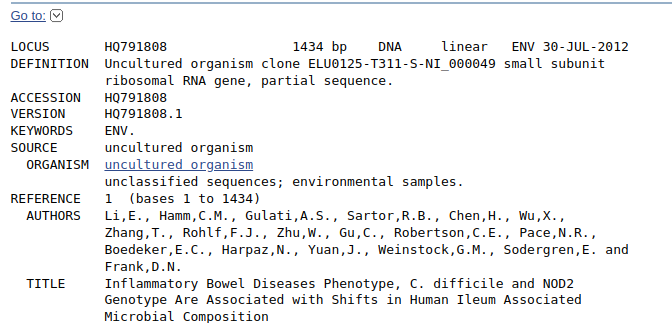

Number of OTUs in dataset:  225011
Number of nodes (taxas):  7600


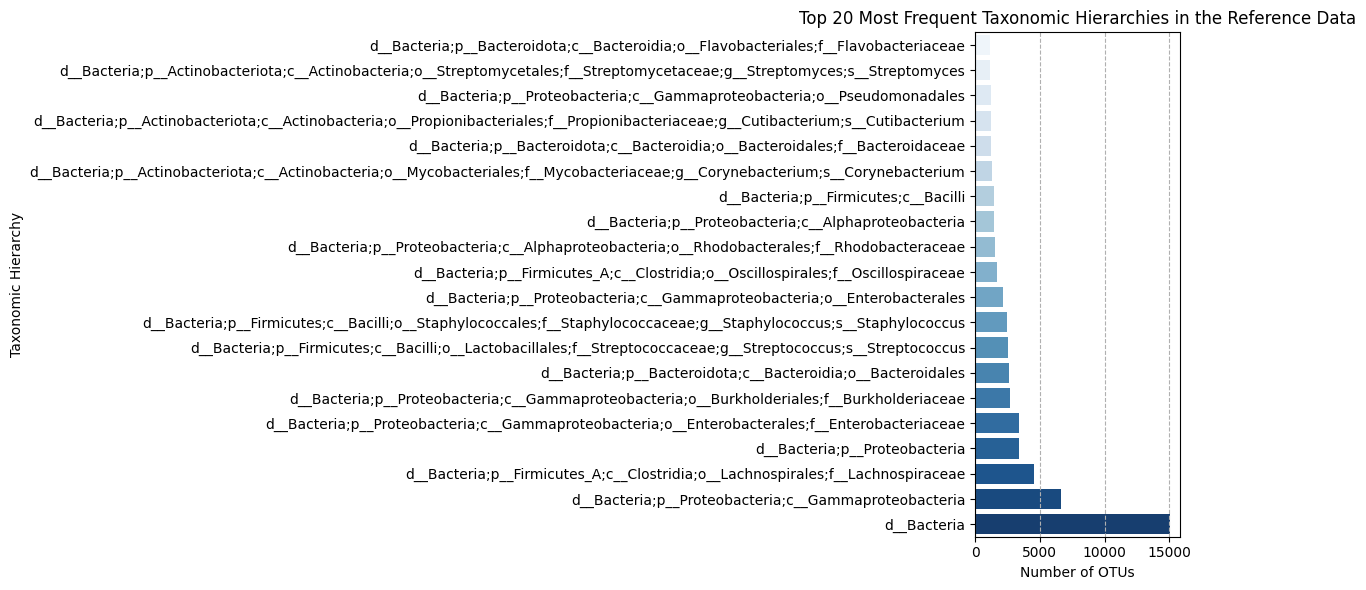

In [118]:
# Load OTU Data
output_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/processed_otus_info.csv"
df_otus = pd.read_csv(output_path)

# Dictionary to store counts with full hierarchy as labels
strict_taxonomy_counts = defaultdict(int)
taxonomy_full_names = {}  # Stores mapping of deepest level to full taxonomy name


for tax_str in df_otus["taxonomy"].dropna():
    levels = tax_str.split(";")
    
    # Take only the **deepest** level
    deepest_level = levels[-1].strip() if levels else None
    
    if deepest_level:
        strict_taxonomy_counts[deepest_level] += 1
        taxonomy_full_names[deepest_level] = tax_str  # Store full taxonomy path

# Convert to DataFrame
df_strict_taxonomy_counts = pd.DataFrame(
    strict_taxonomy_counts.items(), 
    columns=["Taxonomic Level", "OTU Count"]
)

df_strict_taxonomy_counts["Taxonomic Level"] = df_strict_taxonomy_counts["Taxonomic Level"].map(taxonomy_full_names)

df_strict_taxonomy_counts = df_strict_taxonomy_counts.sort_values(by="OTU Count", ascending=False)

# output_count_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/strict_taxonomy_counts_full_names.csv"
# df_strict_taxonomy_counts.to_csv(output_count_path, index=False)

# df_strict_taxonomy_counts.head(20)
print("Number of OTUs in dataset: ", df_strict_taxonomy_counts["OTU Count"].sum())
print("Number of nodes (taxas): " ,len(df_strict_taxonomy_counts["OTU Count"]))
TOP_N = 20  # Adjust this number based on how many you want to visualize

df_top_taxonomies = df_strict_taxonomy_counts.head(TOP_N)

plt.figure(figsize=(12, 6))
sns.barplot(
    y=df_top_taxonomies["Taxonomic Level"], 
    x=df_top_taxonomies["OTU Count"], 
    hue = df_top_taxonomies["Taxonomic Level"],
    palette="Blues_r"
)

plt.xlabel("Number of OTUs")
plt.ylabel("Taxonomic Hierarchy")
plt.title(f"Top {TOP_N} Most Frequent Taxonomic Hierarchies in the Reference Data")
plt.gca().invert_yaxis()  # Invert to show the highest at the top
plt.tight_layout()
plt.grid(axis="x", linestyle="--")


plt.show()

In [119]:
for i in df_strict_taxonomy_counts.head(20)["Taxonomic Level"].items():
	print(i, df_strict_taxonomy_counts["OTU Count"][i[0]])
    

(2, 'd__Bacteria') 15062
(13, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria') 6618
(8, 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae') 4560
(43, 'd__Bacteria;p__Proteobacteria') 3401
(35, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae') 3386
(45, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae') 2713
(65, 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales') 2659
(103, 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus') 2573
(12, 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus') 2446
(94, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales') 2170
(337, 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae') 1684
(30, 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteri

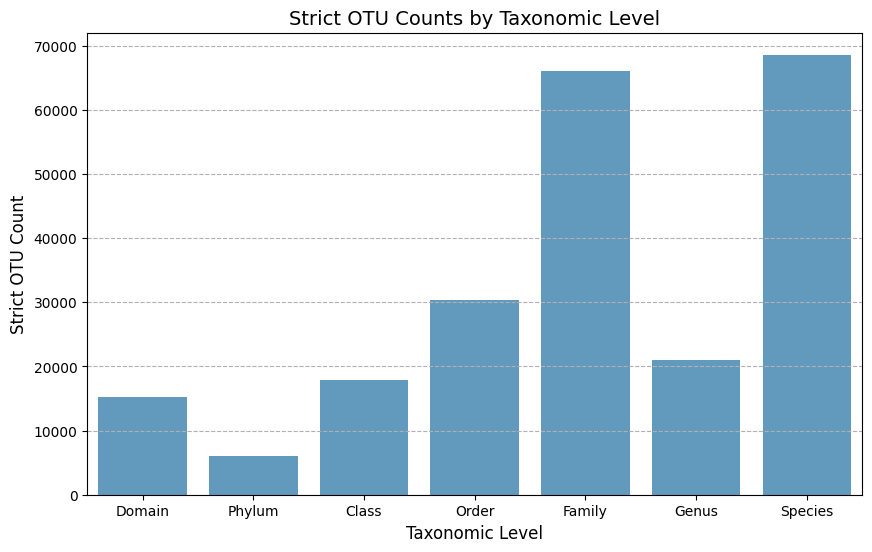

In [ ]:
# Load the strict taxonomy count table
input_file = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/strict_taxonomy_counts_full_names.csv"
df_strict_taxonomy_counts = pd.read_csv(input_file)

# Dictionary to store OTU counts at each level
strict_otu_counts_by_level = defaultdict(int)

# Process each taxonomic entry
for _, row in df_strict_taxonomy_counts.iterrows():
    taxonomy_str = row["Taxonomic Level"]
    otu_count = row["OTU Count"]  # 🔥 Use OTU count instead of just counting rows

    levels = taxonomy_str.split(";")  # Split into hierarchy levels
    
    if levels:  
        # Take **ONLY** the classification level of the deepest assigned rank
        deepest_level = levels[-1].strip()
        level_prefix = deepest_level.split("__")[0]  # Extract taxonomic rank (d, p, c, etc.)
        
        # 🔥 Sum OTU counts instead of just counting occurrences
        strict_otu_counts_by_level[level_prefix] += otu_count

# Convert to DataFrame
df_strict_otu_counts = pd.DataFrame(
    strict_otu_counts_by_level.items(), 
    columns=["Taxonomic Level", "Strict OTU Count"]
)

# Sort taxonomic levels in correct order
level_order = {"d": 0, "p": 1, "c": 2, "o": 3, "f": 4, "g": 5, "s": 6}
df_strict_otu_counts["Order"] = df_strict_otu_counts["Taxonomic Level"].map(level_order)
df_strict_otu_counts = df_strict_otu_counts.sort_values(by="Order").drop(columns=["Order"])

# output_strict_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/strict_otu_counts_by_level.csv"
# df_strict_otu_counts.to_csv(output_strict_path, index=False)

# print(f"Strict OTU count per level saved to: {output_strict_path}")
df_strict_otu_counts.head(10)


level_full_names = {
    "d": "Domain",
    "p": "Phylum",
    "c": "Class",
    "o": "Order",
    "f": "Family",
    "g": "Genus",
    "s": "Species"
}

# Replace short names with full names
df_strict_otu_counts["Taxonomic Level"] = df_strict_otu_counts["Taxonomic Level"].map(level_full_names)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_strict_otu_counts,
    x="Taxonomic Level",
    y="Strict OTU Count",
    color=sns.color_palette("Blues_r")[2]
)

# Labels and title
plt.xlabel("Taxonomic Level", fontsize=12)
plt.ylabel("Strict OTU Count", fontsize=12)
plt.title("Strict OTU Counts by Taxonomic Level", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.grid(axis="y", linestyle="--")
plt.show()

In [92]:
df_taxonomy_counts["OTU Count"].sum()

1133758

# plot tree reference data

In [126]:
# Load OTU Data
output_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/processed_otus_info.csv"
df_otus = pd.read_csv(output_path)#.sample(10000)

# Dictionary to store counts with full hierarchy as labels
strict_taxonomy_counts = defaultdict(int)
taxonomy_full_names = {}  # Stores mapping of deepest level to full taxonomy name

for tax_str in df_otus["taxonomy"].dropna():
    levels = tax_str.split(";")
    
    # Take only the **deepest** level
    deepest_level = levels[-1].strip() if levels else None
    
    if deepest_level:
        strict_taxonomy_counts[deepest_level] += 1
        taxonomy_full_names[deepest_level] = tax_str  # Store full taxonomy path

# Convert to DataFrame
df_strict_taxonomy_counts = pd.DataFrame(
    strict_taxonomy_counts.items(), 
    columns=["Taxonomic Level", "OTU Count"]
)

df_strict_taxonomy_counts["Taxonomic Level"] = df_strict_taxonomy_counts["Taxonomic Level"].map(taxonomy_full_names)

df_strict_taxonomy_counts = df_strict_taxonomy_counts.sort_values(by="OTU Count", ascending=False)


#############
N = 500  # Adjust for readability
df_top_taxonomies = df_strict_taxonomy_counts.head(N)
df_top_taxonomies = df_top_taxonomies.copy()  # Ensure it's a copy

df_top_taxonomies.loc[:, "OTU Count (Log)"] = np.log10(df_top_taxonomies["OTU Count"])
# Apply logarithmic transformation to OTU counts

# Normalize OTU Count (Log) for coloring and branch thickness
otu_min_log = df_top_taxonomies["OTU Count (Log)"].min()
otu_max_log = df_top_taxonomies["OTU Count (Log)"].max()

otu_min = df_top_taxonomies["OTU Count"].min()
otu_max = df_top_taxonomies["OTU Count"].max()

print(f"Min OTU Count: {otu_min}, Max OTU Count: {otu_max}")  # Debug

norm = mcolors.Normalize(vmin=otu_min_log, vmax=otu_max_log)
colormap = plt.colormaps.get_cmap("plasma")  # Use new method for colormap

# Create tree
tree = Tree()
node_dict = {}

# Build tree from taxonomy hierarchy
for _, row in df_top_taxonomies.iterrows():
    taxonomy_str = row["Taxonomic Level"]  
    otu_count = row["OTU Count"]
    otu_count_log = np.log10(otu_count + 1)  # Apply log transformation for visualization
    
    levels = [lvl.strip() for lvl in taxonomy_str.split(";") if lvl.strip()]
    
    parent = tree
    for lvl in levels:
        if lvl not in node_dict:
            node_dict[lvl] = parent.add_child(name=lvl)
        parent = node_dict[lvl]
    
    # Assign OTU count to leaf nodes
    parent.add_features(otu_count=otu_count, otu_count_log=otu_count_log)
    
MAX_BRANCH_LENGTH = 1.0  

# Apply color styling based on OTU count (log)
for node in tree.traverse():
    nstyle = NodeStyle()
    if not node.is_root():
        node.dist = min(node.dist, MAX_BRANCH_LENGTH)
        
    # Assign color & thickness only to nodes with OTU count
    if hasattr(node, "otu_count_log"):
        color = colormap(norm(node.otu_count_log))  # Get color from colormap
        hex_color = mcolors.to_hex(color)  # Convert to hex
        
        # Adjust branch thickness based on log OTU count
        line_width = int(1 + 10 * ((node.otu_count_log - otu_min_log) / (otu_max_log - otu_min_log)))

        nstyle["fgcolor"] = hex_color  # Set node color
        nstyle["hz_line_color"] = hex_color  # Set horizontal branch color
        nstyle["vt_line_color"] = hex_color  # Set vertical branch color
        nstyle["hz_line_width"] = line_width  # Adjust branch width
        nstyle["vt_line_width"] = line_width
        nstyle["size"] = 10  # Increase node size
        
    # **ADD NODE NAME LABELS FOR THE FIRST 4 LEVELS**
    if node.get_distance(tree) <= 4:  # If the node is at level ≤ 4
        node.add_face(TextFace(node.name, fsize=15, fgcolor="black"), column=0)

    node.set_style(nstyle)

# Define tree style
ts = TreeStyle()
ts.mode = "c" 
ts.show_leaf_name = False  
ts.scale = 200  # Adjust spacing
ts.force_topology = True  # Ensures layout consistency
ts.rotation = 90  # Rotate for better visualization

# Render the tree to an image
tree_render_path = "/tmp/taxonomy_circle_tree_colored_log.png"
tree.render(tree_render_path, w=2000, units="px", tree_style=ts)

# Create figure for overlaying the colorbar
fig, ax = plt.subplots(figsize=(12, 1))  # Horizontal colorbar

# Create colorbar (log-scale for colors, but real OTU count for labels)
tick_values = np.linspace(otu_min_log, otu_max_log, num=5)  # 5 evenly spaced log values
tick_labels = [f"{int(10**val)}" for val in tick_values]  # Convert log values to real OTU counts

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), cax=ax, orientation='horizontal')
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_labels)  # Use real OTU count values
cbar.set_label("OTU Count (log scale applied to colors)", fontsize=12)

# Save colorbar
colorbar_path = "/tmp/taxonomy_tree_colorbar_log.png"
plt.savefig(colorbar_path, bbox_inches="tight")
plt.close()

# Load tree and colorbar images
tree_img = PIL.Image.open(tree_render_path)
colorbar_img = PIL.Image.open(colorbar_path)

# Combine both images
final_img = PIL.Image.new("RGB", (tree_img.width, tree_img.height + colorbar_img.height), "white")
final_img.paste(tree_img, (0, 0))
final_img.paste(colorbar_img, (tree_img.width // 4, tree_img.height))  # Center the colorbar

# # Display the final image
# final_img.show()
# Save the final image instead of opening it automatically
final_image_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/tree_plots/final_taxonomy_tree.png"
final_img.save(final_image_path)

print(f"Image saved to: {final_image_path}")
print("Open it manually using an image viewer.")

Min OTU Count: 73, Max OTU Count: 15062
Image saved to: /home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/tree_plots/final_taxonomy_tree.png
Open it manually using an image viewer.


# tree but with training data

In [34]:
taxonomy_names_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/matrix_taxa_with_taxonomy.txt"
df_taxonomy = pd.read_csv(taxonomy_names_path, sep="\t", header=None, names=["OTU_ID", "taxonomy"])


for i in range(0, 5):
	print(df_taxonomy["taxonomy"][i])
	print()


d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Gemmatimonadales

d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Gemmatimonadales;f__Gemmatimonadaceae

d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Gemmatimonadales

d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae

d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales



Number of OTUs in dataset:  148579
Number of nodes (taxas):  7416


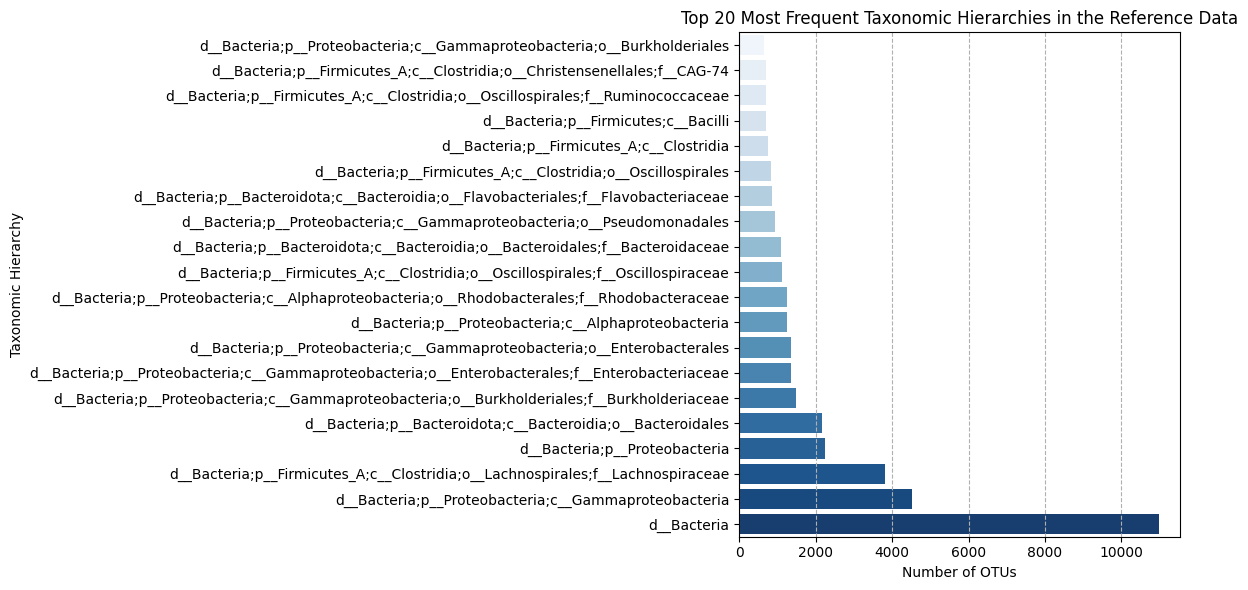

In [107]:
# Dictionary to store counts with full hierarchy as labels
strict_taxonomy_counts = defaultdict(int)
taxonomy_full_names = {}  # Stores mapping of deepest level to full taxonomy name

for tax_str in df_taxonomy["taxonomy"].dropna():
    levels = tax_str.split(";")
    
    # Take only the **deepest** level
    deepest_level = levels[-1].strip() if levels else None
    
    if deepest_level:
        strict_taxonomy_counts[deepest_level] += 1
        taxonomy_full_names[deepest_level] = tax_str  # Store full taxonomy path

# Convert to DataFrame
df_strict_taxonomy_counts = pd.DataFrame(
    strict_taxonomy_counts.items(), 
    columns=["Taxonomic Level", "OTU Count"]
)

df_strict_taxonomy_counts["Taxonomic Level"] = df_strict_taxonomy_counts["Taxonomic Level"].map(taxonomy_full_names)

df_strict_taxonomy_counts = df_strict_taxonomy_counts.sort_values(by="OTU Count", ascending=False)

# output_count_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/strict_taxonomy_counts_full_names.csv"
# df_strict_taxonomy_counts.to_csv(output_count_path, index=False)

# df_strict_taxonomy_counts.head(20)
print("Number of OTUs in dataset: ", df_strict_taxonomy_counts["OTU Count"].sum())
print("Number of nodes (taxas): " ,len(df_strict_taxonomy_counts["OTU Count"]))

TOP_N = 20  # Adjust this number based on how many you want to visualize

df_top_taxonomies = df_strict_taxonomy_counts.head(TOP_N)

plt.figure(figsize=(12, 6))
sns.barplot(
    y=df_top_taxonomies["Taxonomic Level"], 
    x=df_top_taxonomies["OTU Count"], 
    hue = df_top_taxonomies["Taxonomic Level"],
    palette="Blues_r"
)

plt.xlabel("Number of OTUs")
plt.ylabel("Taxonomic Hierarchy")
plt.title(f"Top {TOP_N} Most Frequent Taxonomic Hierarchies in the Reference Data")
plt.gca().invert_yaxis()  # Invert to show the highest at the top
plt.tight_layout()
plt.grid(axis="x", linestyle="--")


plt.show()

In [117]:
for i in df_strict_taxonomy_counts.head(30)["Taxonomic Level"].items():
	print(i, df_strict_taxonomy_counts["OTU Count"][i[0]])
    

(20, 'd__Bacteria') 10981
(147, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria') 4527
(70, 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae') 3819
(44, 'd__Bacteria;p__Proteobacteria') 2256
(8, 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales') 2177
(12, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae') 1496
(105, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae') 1362
(27, 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales') 1349
(37, 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria') 1264
(899, 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae') 1262
(161, 'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae') 1114
(9, 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae') 1099
(174, 'd__Bacteria;p__Proteobacteria;c__Gam

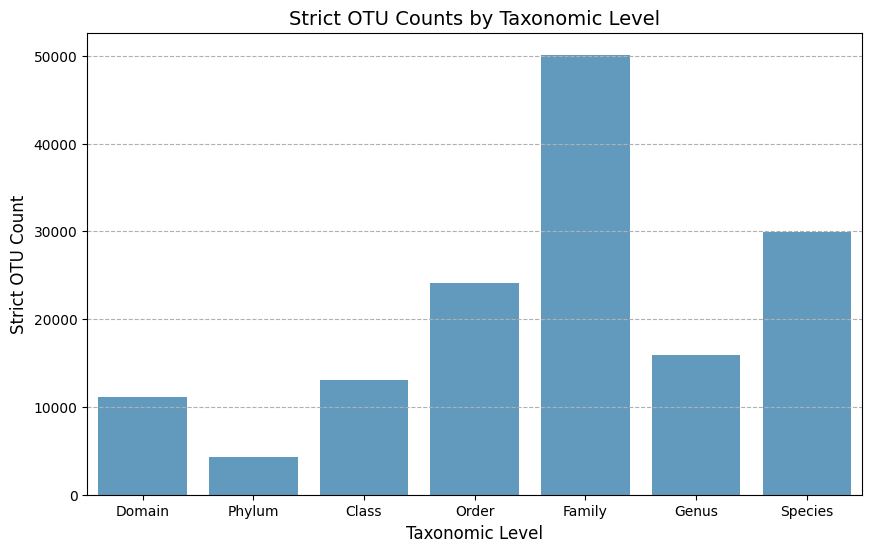

In [53]:
# Dictionary to store OTU counts at each level
strict_otu_counts_by_level = defaultdict(int)

# Process each taxonomic entry
for _, row in df_strict_taxonomy_counts.iterrows():
    taxonomy_str = row["Taxonomic Level"]
    otu_count = row["OTU Count"]  # 🔥 Use OTU count instead of just counting rows

    levels = taxonomy_str.split(";")  # Split into hierarchy levels
    
    if levels:  
        # Take **ONLY** the classification level of the deepest assigned rank
        deepest_level = levels[-1].strip()
        level_prefix = deepest_level.split("__")[0]  # Extract taxonomic rank (d, p, c, etc.)
        
        # 🔥 Sum OTU counts instead of just counting occurrences
        strict_otu_counts_by_level[level_prefix] += otu_count

# Convert to DataFrame
df_strict_otu_counts = pd.DataFrame(
    strict_otu_counts_by_level.items(), 
    columns=["Taxonomic Level", "Strict OTU Count"]
)

# Sort taxonomic levels in correct order
level_order = {"d": 0, "p": 1, "c": 2, "o": 3, "f": 4, "g": 5, "s": 6}
df_strict_otu_counts["Order"] = df_strict_otu_counts["Taxonomic Level"].map(level_order)
df_strict_otu_counts = df_strict_otu_counts.sort_values(by="Order").drop(columns=["Order"])



level_full_names = {
    "d": "Domain",
    "p": "Phylum",
    "c": "Class",
    "o": "Order",
    "f": "Family",
    "g": "Genus",
    "s": "Species"
}

# Replace short names with full names
df_strict_otu_counts["Taxonomic Level"] = df_strict_otu_counts["Taxonomic Level"].map(level_full_names)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_strict_otu_counts,
    x="Taxonomic Level",
    y="Strict OTU Count",
    color=sns.color_palette("Blues_r")[2]
)

# Labels and title
plt.xlabel("Taxonomic Level", fontsize=12)
plt.ylabel("Strict OTU Count", fontsize=12)
plt.title("Strict OTU Counts by Taxonomic Level", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.grid(axis="y", linestyle="--")
plt.show()

In [47]:
df_strict_taxonomy_counts["OTU Count"]

20      10981
147      4527
70       3819
44       2256
8        2177
        ...  
5640        1
5639        1
5637        1
5635        1
7415        1
Name: OTU Count, Length: 7416, dtype: int64

In [72]:
taxonomy_names_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/matrix_taxa_with_taxonomy.txt"
df_taxonomy = pd.read_csv(taxonomy_names_path, sep="\t", header=None, names=["OTU_ID", "taxonomy"])#.sample(10000)

# Dictionary to store counts with full hierarchy as labels
strict_taxonomy_counts = defaultdict(int)
taxonomy_full_names = {}  # Stores mapping of deepest level to full taxonomy name

for tax_str in df_taxonomy["taxonomy"].dropna():
    levels = tax_str.split(";")
    
    # Take only the **deepest** level
    deepest_level = levels[-1].strip() if levels else None
    
    if deepest_level:
        strict_taxonomy_counts[deepest_level] += 1
        taxonomy_full_names[deepest_level] = tax_str  # Store full taxonomy path

# Convert to DataFrame
df_strict_taxonomy_counts = pd.DataFrame(
    strict_taxonomy_counts.items(), 
    columns=["Taxonomic Level", "OTU Count"]
)

df_strict_taxonomy_counts["Taxonomic Level"] = df_strict_taxonomy_counts["Taxonomic Level"].map(taxonomy_full_names)

df_strict_taxonomy_counts = df_strict_taxonomy_counts.sort_values(by="OTU Count", ascending=False)



N = 1000  # Adjust for readability
df_top_taxonomies = df_strict_taxonomy_counts.head(N)

# Apply logarithmic transformation to OTU counts
df_top_taxonomies["OTU Count (Log)"] = np.log10(df_top_taxonomies["OTU Count"]) 

# Normalize OTU Count (Log) for coloring and branch thickness
otu_min_log = df_top_taxonomies["OTU Count (Log)"].min()
otu_max_log = df_top_taxonomies["OTU Count (Log)"].max()

otu_min = df_top_taxonomies["OTU Count"].min()
otu_max = df_top_taxonomies["OTU Count"].max()

print(f"Min OTU Count: {otu_min}, Max OTU Count: {otu_max}")  # Debug

norm = mcolors.Normalize(vmin=otu_min_log, vmax=otu_max_log)
colormap = plt.colormaps.get_cmap("plasma")  # Use new method for colormap

# Create tree
tree = Tree()
node_dict = {}

# Build tree from taxonomy hierarchy
for _, row in df_top_taxonomies.iterrows():
    taxonomy_str = row["Taxonomic Level"]  
    otu_count = row["OTU Count"]
    otu_count_log = np.log10(otu_count)  # Apply log transformation for visualization
    
    levels = [lvl.strip() for lvl in taxonomy_str.split(";") if lvl.strip()]
    
    parent = tree
    for lvl in levels:
        if lvl not in node_dict:
            node_dict[lvl] = parent.add_child(name=lvl)
        parent = node_dict[lvl]
    
    # Assign OTU count to leaf nodes
    parent.add_features(otu_count=otu_count, otu_count_log=otu_count_log)
    
MAX_BRANCH_LENGTH = 1.0  

# Apply color styling based on OTU count (log)
for node in tree.traverse():
    nstyle = NodeStyle()
    if not node.is_root():
        node.dist = min(node.dist, MAX_BRANCH_LENGTH)
        
    # Assign color & thickness only to nodes with OTU count
    if hasattr(node, "otu_count_log"):
        color = colormap(norm(node.otu_count_log))  # Get color from colormap
        hex_color = mcolors.to_hex(color)  # Convert to hex
        
        # Adjust branch thickness based on log OTU count
        line_width = int(1 + 10 * ((node.otu_count_log - otu_min_log) / (otu_max_log - otu_min_log)))

        nstyle["fgcolor"] = hex_color  # Set node color
        nstyle["hz_line_color"] = hex_color  # Set horizontal branch color
        nstyle["vt_line_color"] = hex_color  # Set vertical branch color
        nstyle["hz_line_width"] = line_width  # Adjust branch width
        nstyle["vt_line_width"] = line_width
        nstyle["size"] = 10  # Increase node size

    node.set_style(nstyle)

# Define tree style
ts = TreeStyle()
ts.mode = "c" 
ts.show_leaf_name = False  
ts.scale = 200  # Adjust spacing
ts.force_topology = True  # Ensures layout consistency
ts.rotation = 90  # Rotate for better visualization

# Render the tree to an image
tree_render_path = "/tmp/taxonomy_circle_tree_colored_log.png"
tree.render(tree_render_path, w=2000, units="px", tree_style=ts)

# Create figure for overlaying the colorbar
fig, ax = plt.subplots(figsize=(12, 1))  # Horizontal colorbar

# Create colorbar (log-scale for colors, but real OTU count for labels)
tick_values = np.linspace(otu_min_log, otu_max_log, num=5)  # 5 evenly spaced log values
tick_labels = [f"{int(10**val)}" for val in tick_values]  # Convert log values to real OTU counts

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), cax=ax, orientation='horizontal')
cbar.set_ticks(tick_values)
cbar.set_ticklabels(tick_labels)  # Use real OTU count values
cbar.set_label("OTU Count (log scale applied to colors)", fontsize=12)

# Save colorbar
colorbar_path = "/tmp/taxonomy_tree_colorbar_log.png"
plt.savefig(colorbar_path, bbox_inches="tight")
plt.close()

# Load tree and colorbar images
tree_img = PIL.Image.open(tree_render_path)
colorbar_img = PIL.Image.open(colorbar_path)

# Combine both images
final_img = PIL.Image.new("RGB", (tree_img.width, tree_img.height + colorbar_img.height), "white")
final_img.paste(tree_img, (0, 0))
final_img.paste(colorbar_img, (tree_img.width // 4, tree_img.height))  # Center the colorbar

# Display the final image
final_img.show()

/tmp/ipykernel_588149/198809181.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_taxonomies["OTU Count (Log)"] = np.log10(df_top_taxonomies["OTU Count"])


Min OTU Count: 22, Max OTU Count: 10981


# clasify by taxonomy

In [74]:
import scipy.sparse as sp
import numpy as np
import pandas as pd

# Load Data
matrix_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/samples-otus-99-filtered-matrix.npz"
taxonomy_names_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/matrix_taxa_with_taxonomy.txt"

df_taxonomy = pd.read_csv(taxonomy_names_path, sep="\t", header=None, names=["OTU_ID", "taxonomy"])

# Load sparse matrix
X = sp.load_npz(matrix_path)  # shape (N_samples, N_features)

# Step 1: Create Taxonomy Mapping
taxonomy_list = df_taxonomy["taxonomy"].unique()  # Unique taxonomies
taxonomy_index = {tax: i for i, tax in enumerate(taxonomy_list)}  # Map taxonomy to index
otu_index = {otu: i for i, otu in enumerate(df_taxonomy["OTU_ID"])}  # OTU to column index in X

# Step 2: Build Sparse Mapping Matrix (OTU → Taxonomy)
num_otus = len(df_taxonomy)
num_taxonomies = len(taxonomy_list)

# Sparse matrix shape (num_otus, num_taxonomies)
otu_to_taxonomy_matrix = sp.lil_matrix((num_otus, num_taxonomies))

for otu, tax in zip(df_taxonomy["OTU_ID"], df_taxonomy["taxonomy"]):
    otu_idx = otu_index[otu]
    tax_idx = taxonomy_index[tax]
    otu_to_taxonomy_matrix[otu_idx, tax_idx] = 1  # Assign OTU to corresponding taxonomy

otu_to_taxonomy_matrix = otu_to_taxonomy_matrix.tocsr()  # Convert to CSR for fast matrix multiplication

# Step 3: Aggregate OTU abundances by multiplying matrices
X_taxonomy = X @ otu_to_taxonomy_matrix  # (samples x OTUs) * (OTUs x Taxonomies) = (samples x Taxonomies)

# Step 4: Save New Matrix
taxonomy_matrix_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/samples-taxonomy-matrix.npz"
sp.save_npz(taxonomy_matrix_path, X_taxonomy)

taxonomy_mapping_path = "/home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/taxonomy_mapping.csv"
df_taxonomy_mapping = pd.DataFrame({"taxonomy": taxonomy_list})
df_taxonomy_mapping.to_csv(taxonomy_mapping_path, index=False)

print(f"✅ Optimized! Transformed OTU matrix to Taxonomy matrix with shape {X_taxonomy.shape}")
print(f"✅ Saved taxonomy matrix to: {taxonomy_matrix_path}")
print(f"✅ Saved taxonomy mapping to: {taxonomy_mapping_path}")

✅ Optimized! Transformed OTU matrix to Taxonomy matrix with shape (1836255, 8520)
✅ Saved taxonomy matrix to: /home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/samples-taxonomy-matrix.npz
✅ Saved taxonomy mapping to: /home/hernan_melmoth/Documents/phd_work/Bio_ontology/MicrobeAtlas/preprosses_data/taxonomy_mapping.csv


In [81]:
df_taxonomy

,OTU_ID,taxonomy
0,90_10000;96_43457;97_55623;98_73625;99_108404,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonad...
1,90_10000;96_43457;97_55623;98_73625;99_159894,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonad...
2,90_10000;96_58557;97_75779;98_102188;99_154975,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonad...
3,90_10001;96_43472;97_55646;98_73654;99_108447,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
4,90_10002;96_43475;97_55649;98_73658;99_108454,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...
...,...,...
148610,90_9;96_99;97_138;98_2663;99_186668,d__Bacteria;p__Actinobacteriota;c__Actinobacte...
148611,90_9;96_99;97_138;98_2663;99_3469,d__Bacteria
148612,90_9;96_99;97_64827;98_86488;99_129155,d__Bacteria;p__Actinobacteriota;c__Actinobacte...
148613,90_9;96_99;97_69326;98_92920;99_139756,d__Bacteria;p__Actinobacteriota;c__Actinobacte...


In [88]:
# Select the first sample (index 0)
sample_index = 0

# Get non-zero OTUs for the first sample
nonzero_otu_indices = X[sample_index].nonzero()[1]  # Get OTU indices
nonzero_otu_values = X[sample_index, nonzero_otu_indices].toarray().flatten()  # Convert to array

# Get non-zero taxonomies for the first sample
nonzero_tax_indices = X_taxonomy[sample_index].nonzero()[1]  # Get taxonomy indices
nonzero_tax_values = X_taxonomy[sample_index, nonzero_tax_indices].toarray().flatten()  # Convert to array

# Retrieve OTU IDs and Taxonomy Names
otus = [df_taxonomy.iloc[i]["taxonomy"] for i in nonzero_otu_indices]
taxonomies = [taxonomy_list[i] for i in nonzero_tax_indices]  # taxonomy_list should contain unique taxonomies

# Display results
print("\n🔹 Non-Zero OTUs in Sample 1:")
for otu, value in zip(otus, nonzero_otu_values):
    print(f"  - {otu}: {value}")

print("\n🔹 Non-Zero Taxonomies in Sample 1:")
for tax, value in zip(taxonomies, nonzero_tax_values):
    print(f"  - {tax}: {value}")


🔹 Non-Zero OTUs in Sample 1:
  - d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium_A;s__Fusobacterium_A: 0.00641025641025641
  - d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae: 0.01282051282051282
  - d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae: 0.009615384615384616
  - d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Massiliomicrobiota;s__Massiliomicrobiota: 0.01282051282051282
  - d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_A;s__Bacteroides_A: 0.01282051282051282
  - d__Bacteria;p__Firmicutes;c__Bacilli;o__Haloplasmatales;f__Turicibacteraceae;g__Turicibacter;s__Turicibacter: 0.27564102564102566
  - d__Bacteria;p__Firmicutes;c__Bacilli;o__Haloplasmatales;f__Turicibacteraceae;g__Turicibacter;s__Turicibacter: 0.5512820512820513
  - d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Pepto

In [83]:
0.27564102564102566 + 0.5512820512820513


0.826923076923077